<center>
        <h1>CS 251/340 Machine Learning</h1>
        <h2>AUA, Spring 2022</h2>
        <h1> Homework 05 </h1>
</center>

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR, SVC, LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification

from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

# (Python) Problem 01: Regression

  * Generate a 1D Regression Dataset $(x_k, y_k)$, $k=1,.., 400$, from the Bivariate Normal Distribution with Mean $[0,0]^T$, and such that the Variances of $X$ and $Y$ are equal to 1, and the correlation coefficient $cor(X,Y) = 0.83$;
  * Split the Dataset into 30/70 Test/Train Datasets;
  * Construct Regression Models by using
      - OLS
      - 5-NN Regression
      - Support Vector Regression (with some parameters)
  * Draw the Regression curves obtained
  * Compare the Models on the Test Data and choose the best one
  * Predict the Label for the observation with the Feature vector [0].

In [5]:
mu = np.array([0, 0])
sigma = np.array([[1, 0.83], [0.83, 1]])
df = np.random.multivariate_normal(mu, sigma, size=400)
df.shape

(400, 2)

In [23]:
X = df[:,0].reshape(-1,1)
y = df[:,1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
ols = LinearRegression().fit(X_train, y_train)
knn5 = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)
svr = SVR(kernel='linear').fit(X_train, y_train)

In [25]:
print('OLS score', mean_squared_error(y_test, ols.predict(X_test)))
print('KNN score', mean_squared_error(y_test, knn5.predict(X_test)))
print('SVR score', mean_squared_error(y_test, svr.predict(X_test)))

OLS score 0.34019195977739347
KNN score 0.4306752657244129
SVR score 0.34240038613806956


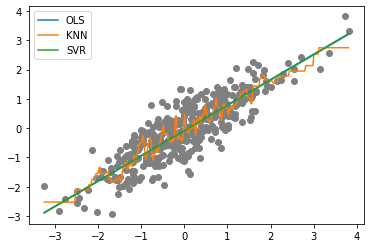

In [26]:
x_linspace = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)

plt.scatter(X, y, c='grey')
plt.plot(x_linspace, ols.predict(x_linspace), label = 'OLS')
plt.plot(x_linspace, knn5.predict(x_linspace), label = 'KNN')
plt.plot(x_linspace, svr.predict(x_linspace), label = 'SVR')
plt.legend()
plt.show()

In [28]:
print(ols.predict([[0]]))
print(svr.predict([[0]]))

[-0.0694064]
[-0.09232336]


# (Python) Problem 02: MLE for Bivariate Normal

  * Take
  $$
  \mu = \left[\begin{array}{c} 1\\ -2 \end{array}\right], \qquad \Sigma = \left[\begin{array}{cc} 5 & 2\\ 2 & 8 \end{array}\right],
  $$

  * Generate a Sample of size $500$ from $\mathcal{N}(\mu, \Sigma)$;
  * Now assume we do not have $\mu$ and $\Sigma$, and we want to Estimate them using the above Sample, and the MLE: Calculate the MLE Estimates for $\mu$ and $\Sigma$, and check if they are close to the true values.

In [30]:
mu = np.array([1, -2])
sigma = np.array([[5,2], [2, 8]])
df = np.random.multivariate_normal(mu, sigma, 500)

In [33]:
df[:,0].mean(), df[:,1].mean()

(1.0404259655141286, -2.066151060591256)

In [34]:
np.cov(df[:,0], df[:,1])

array([[5.39290189, 2.67094921],
       [2.67094921, 9.49936759]])

# (Python) Problem 03: LDA Implementation

 Using only `numpy`-s or `scipy`-s functions, implement the Binary Classification LDA algorithm. Test on some Dataset, and compare with the `sklearn`-s built-in LDA algorithm.

In [133]:
mu = np.array([0, 0])
sigma = np.array([[1, 0.83], [0.83, 1]])
X0 = np.random.multivariate_normal(mu, sigma, size=100)
y0 = np.zeros(shape=(100, ))


mu = np.array([0, 1])
sigma = np.array([[1, 0.9], [0.9, 1]])
X1 = np.random.multivariate_normal(mu, sigma, size=110)
y1 = np.ones(shape=(110, ))

In [134]:
X = np.append(X0, X1, axis=0)
y = np.append(y0, y1, axis=0)
X.shape, y.shape

((210, 2), (210,))

In [135]:
means0 = X0.mean(axis=0)
means1 = X1.mean(axis=0)

sigmas0 = np.cov(X0.T)
sigmas1 = np.cov(X1.T)


n0 = X0.shape[0]
n1 = X1.shape[1]
w_sigma = (n0/(n0+n1)*sigmas0 + n1/(n0+n1)*sigmas1)
w_sigma

array([[1.17917764, 0.97667958],
       [0.97667958, 1.07338736]])

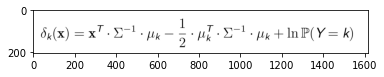

In [136]:
from matplotlib import image
img = image.imread("discriminant_f.png")
plt.imshow(img)
plt.show()

In [137]:
means0.shape

(2,)

In [138]:
new_x = np.array([-1, -2])

In [139]:
delta0 = new_x.T @ np.linalg.inv(w_sigma) @ means0 - 0.5*means0.T @ np.linalg.inv(w_sigma) @ means0 + np.log(n0/(n0+n1))
delta1 = new_x.T @ np.linalg.inv(w_sigma) @ means1 - 0.5*means1.T @ np.linalg.inv(w_sigma) @ means1 + np.log(n1/(n0+n1))

print(delta0, delta1)
1 if delta1 >= delta0 else 0

-0.21701942046640033 -10.49508875216852


0

In [140]:
decision = []

for new_x in X:    

    delta0 = new_x.T @ np.linalg.inv(w_sigma) @ means0 - 0.5*means0.T @ np.linalg.inv(w_sigma) @ means0 + np.log(n0/(n0+n1))
    delta1 = new_x.T @ np.linalg.inv(w_sigma) @ means1 - 0.5*means1.T @ np.linalg.inv(w_sigma) @ means1 + np.log(n1/(n0+n1))
    
    decision.append(1 if delta1 >= delta0 else 0)

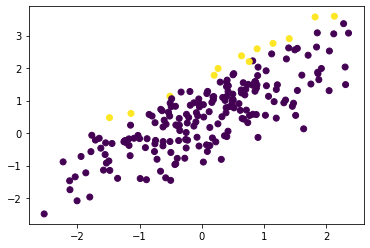

In [142]:
plt.scatter(X[:,0], X[:,1], c=decision)

In [182]:
model = LinearDiscriminantAnalysis(solver='eigen').fit(X, y)
model.predict(X)

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1.])

# Problem 04: LDA by a Hand

  Assume we have a 2D Binary Classification Dataset, with equal number of Datapoints in each class, and, using that Dataset, we are estimating:
  $$
  \hat{\mu}_1 = \left[\begin{array}{c} -1\\ 0 \end{array}\right], \qquad 
  \hat{\mu}_2 = \left[\begin{array}{c} 4\\ 8 \end{array}\right],\qquad \hat{\Sigma} = \left[\begin{array}{cc} 2 & 0\\ 0 & 1 \end{array}\right].
  $$

  Construct the Decision function and Decision Boundary of the LDA Classifier in this case.



In [178]:
np.linalg.inv(np.array([[2,0], [0,1]]))

array([[0.5, 0. ],
       [0. , 1. ]])

In [180]:
np.array([2, 4]) @ np.array([[0.5, 0], [0,1]]) @ np.array([[4], [8]])

array([36.])

In [181]:
np.log(0.5)

-0.6931471805599453

# Problem 05: Sigmoid Function

  * Express the derivative of the Sigmoid function by itself
  * (Python) Draw the graph of the Sigmoid function over $[-5,5]$

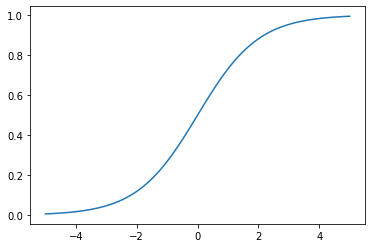

In [183]:
x_linspace = np.linspace(-5, 5, 100)
y_sigmoid = np.e**x_linspace/(1+np.e**x_linspace)

plt.plot(x_linspace, y_sigmoid)

# Problem 06: Logistic Regression

Assume we have a 2D Binary Classification Dataset (with Labels from $\{0,1\}$), and we are fitting a Logistic Regression model. Assume the trained values for the parameters (weights) are
$$
w_0 = -2, \qquad w_1 = 1, \qquad w_2 = -1.
$$
Also, we have a new Observation with the Feature vector $x = [2,3]$.

  * Predict the Label of the new Observation
  * Estimate the Probabilities that the new Observation belongs to the Class 0 and the Class 1
  * Draw Decision Boundary and the Decision Regions

In [191]:
x1 = np.random.uniform(0, 10, 100)
x2 = np.random.uniform(0, 10, 100)

lin_func = -2 + 1*x1 + (-1)*x2
pred_prob = np.e**lin_func/(1+np.e**lin_func)

In [201]:
y = np.where(pred_prob > 0.5, 1, 0)

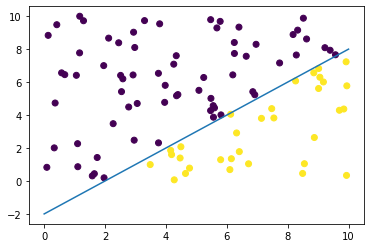

In [203]:
x_points = np.linspace(0, 10, 100)
decision_boundary_line = -(1/(-1)) * x_points -(-2 / -1)
plt.scatter(x1, x2, c=y)
plt.plot(x_points, decision_boundary_line)

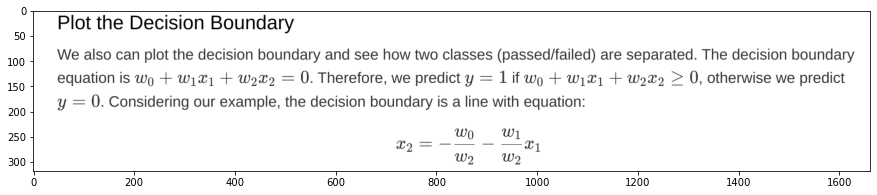

In [206]:
from matplotlib import image
img = image.imread("decision_boundary.png")
plt.figure(figsize=(15, 20))
plt.imshow(img)
plt.show()

# Problem 07: Logistic Regression Loss

We are given the following Dataset of 3 Observations:

 | $X_1$ | $X_2$| $Y$ |
 | --| --| -- | 
 | 0 | 0 | 0 |
 | 1 | 1 | 0 |
 | 0 | 1 | 1 | 
  
and we want to fit a Logistic Regression Model.

 - Write down the Model
 - Write down the BCE Loss explicitly as a function of Model weights
 - (Python) Solve the BCE Loss minimization problem using some minimization algorithm in Python, and compare the result with the `sklearn` Logistic Regression Model fitted Model weights

# Problem 08: Margin Calculation

We are given the following Dataset of 4 Observations:

 | $X_1$ | $X_2$| $Y$ |
 | --| --| -- | 
 | 0 | 4 | -1 |
 | 0 | 2 | -1 |
 | -1 | 0 | 1 | 
 | 2 | 0 | 1 | 


  * Find the Margin in the direction of the Line (Hyperplane)
  $$
  2x_1 - 3x_2 + 7 = 0
  $$
  * Find the Maximum Margin Separating Line (Hyperplane)
  * Find the Label of the new Observation with Feature Vector $x = [1,1]^T$.

# (Python) Problem 09: Classification over Synthetic Dataset


  * Generate a 2D Feature, 1D Target (Label) Binary Classification Dataset with a Size 550 using the `make_classification` function, by fixing the random state to 1234.
  * Divide the Dataset into 75/25 Train/Test Datasets
  * Fit LDA, QDA, Logistic Regression and SVM Models with different parameters, choose the Best Model among them
  * Report the Accuracy of the Best Model chosen above over the Test Dataset
  * Predict, using the model obtained in the last step, the Label of some custom (you give it!) observation


In [3]:
X, y = make_classification(550, n_features=2, n_classes=2, n_redundant=0, random_state=1234)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [5]:
lda = LinearDiscriminantAnalysis().fit(X_train, y_train)
qda = QuadraticDiscriminantAnalysis().fit(X_train, y_train)
svm_rbf = SVC(kernel='rbf').fit(X_train, y_train)
svm_linear = SVC(kernel='linear').fit(X_train, y_train)

In [6]:
for i in [lda, qda, svm_rbf, svm_linear]:
    print(i, i.score(X_test, y_test))

LinearDiscriminantAnalysis() 0.927536231884058
QuadraticDiscriminantAnalysis() 0.9202898550724637
SVC() 0.9492753623188406
SVC(kernel='linear') 0.9130434782608695


In [10]:
X_test[0].shape

(2,)

In [14]:
svm_rbf.predict([X_test[0]])

array([0])

# (Python) Problem 10: Scaling Effect

To see if the scaling is affecting the SVM Performance, do the following Experiment:

  * Generate a 2D Classification Dataset (call it the Original Dataset)
  * Multiply one of the Features by 10^4, and obtain in this way a new Dataset (call it the Transformed Dataset)
  * Use `SVC` and `LinearSVC` for both Datasets (with Training/Test splits), and calculate the Accuracies
  * Predict the Label for some new Observation using both Models.

In [32]:
from copy import deepcopy
X_orig, y = make_classification(1000, n_features=2, n_classes=2, n_redundant=0, random_state=1234)

X_transf = deepcopy(X_orig)
X_transf[:,0] = X_transf[:,0]*10**4

In [33]:
print(X_orig.mean(axis=0))
print(X_transf.mean(axis=0))

[0.05249977 0.02883937]
[5.24997718e+02 2.88393697e-02]


In [34]:
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X_orig, y, test_size=0.25, random_state=42)
X_train_transf, X_test_transf, y_train, y_test = train_test_split(X_transf, y, test_size=0.25, random_state=42)

In [35]:
svc_orig = SVC().fit(X_train_orig, y_train)
svc_transf = SVC().fit(X_train_transf, y_train)

svc_linear_orig = LinearSVC().fit(X_train_orig, y_train)
svc_linear_transf = LinearSVC().fit(X_train_transf, y_train)

/home/hermine/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [36]:
print('Original dataset')
for i in svc_orig, svc_linear_orig:
    print(i, i.score(X_test_orig, y_test))

Original dataset
SVC() 0.968
LinearSVC() 0.968


In [37]:
print('Transformed dataset')
for i in svc_transf, svc_linear_transf:
    print(i, i.score(X_test_transf, y_test))

Transformed dataset
SVC() 0.612
LinearSVC() 0.66


In [38]:
svc_orig.predict([X_test_orig[0]])

array([0])

In [39]:
svc_transf.predict([X_test_transf[0]])

array([1])

# Problem 11: Scaling by a Hand

We are given the following Dataset

 | $X_1$ | $X_2$| $Y$ |
 | --| --| -- | 
 | 0 | 4 | -1 |
 | 0 | 2 | -1 |
 | -1 | 0 | 1 | 
 | 2 | 0 | 1 | 


Do, by a Hand, MinMax Scaling and Standard Scaling.  Scale also the new Observation with Feature Vector $x = [2,2]^T$.

In [12]:
def min_max_scaling(vec):
    min_ = np.min(vec)
    max_ = np.max(vec)
    
    return {'min': min_, 'max': max_, 'scaled': (vec - min_) / (max_ - min_)}

def min_max_transform(training_vec, feature_vec):
    min_max_df = min_max_scaling(training_vec)
    
    return (feature_vec - min_max_df['min']) / (min_max_df['max'] - min_max_df['min'])

In [21]:
def standard_scaling(vec):
    mean_ = np.mean(vec)
    std_ = np.std(vec)
    
    return {'mean': mean_, "std": std_, 'scaled': (vec - mean_)/std_}

def standard_transform(training_vec, feature_vec):
    standard_df = standard_scaling(training_vec)
    
    return (feature_vec - standard_df['mean'])/standard_df['std']

In [22]:
x1 = [0, 0, -1, 2]
x2 = [4, 2, 0, 0]
feature_vec = [2, 2]

In [24]:
print('min_max scaling', min_max_transform(x1, feature_vec[0]), min_max_transform(x2, feature_vec[1]))
print('standard scaling', standard_transform(x1, feature_vec[0]), standard_transform(x2, feature_vec[1]))

min_max scaling 1.0 0.5
standard scaling 1.6059101370939322 0.30151134457776363


# (Python) Problem 12: MNIST Classification

Try different Classification Algorithms (kNN, NB, LDA, QDA, LR, SVM with different kernels, LinearSVM) for MNIST Dataset. Try different parameters, choose the Best Model among the considered ones. Report the generalization Accuracy. 

In [1]:
from keras.datasets import mnist

2022-04-17 23:20:44.984351: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-17 23:20:44.984499: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [7]:
X_train_flat = []
for i in range(X_train.shape[0]):
    X_train_flat.append(X_train[i].flatten())
    
X_test_flat = []
for i in range(X_test.shape[0]):
    X_test_flat.append(X_test[i].flatten())

In [8]:
X_train = np.array(X_train_flat)
X_test = np.array(X_test_flat)

In [13]:
X_test[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [31]:
knn = KNeighborsRegressor().fit(X_train, y_train)
print(1)
nb = GaussianNB().fit(X_train, y_train)
print(2)
lda = LinearDiscriminantAnalysis().fit(X_train, y_train)
print(3)
qda = QuadraticDiscriminantAnalysis().fit(X_train, y_train)
print(4)
lr = LinearRegression().fit(X_train, y_train)
print(5)
svm_rbf = SVC(kernel='rbf').fit(X_train, y_train)
print(6)
svm_poly = SVC(kernel='poly').fit(X_train, y_train)
print(7)
svc_linear = SVC(kernel='linear').fit(X_train, y_train)
print(8)
svm_linear = LinearSVC().fit(X_train, y_train)

1
2
3


/home/hermine/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


4
5
6
7


In [ ]:
for i in [knn, nb, lda, lr, svm_rbf, svm_poly, svc_linear, svm_linear]:
    print(i, i.score(X_test, y_test))

# (Python) Problem 13: Fashion MNIST Classification

[Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) is an alternative MNIST Dataset. Solve the previous problem for Fashion MNIST Dataset. Take some real images of different Fashion items (T-shirts, Bags, Shoes,...) and predict their Labels using the Best Model chosen.